#Setup

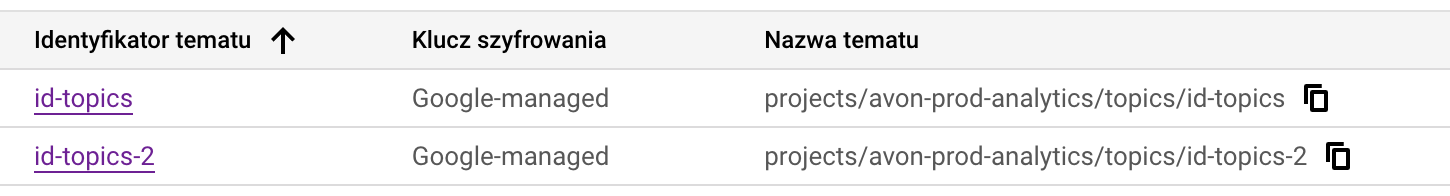

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving counts.csv to counts.csv


#publish.py

In [ ]:
import os
import time
from google.cloud import pubsub_v1

if __name__ == "__main__":

    project = 'avon-prod-analytics'
    pubsub_topic = 'projects/avon-prod-analytics/topics/id-topics'
    sa = '/content/avon-prod-analytics.json'
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = sa

    input_file = '/content/counts.csv'

    publisher = pubsub_v1.PublisherClient()

    with open(input_file, 'rb') as ifp:
        header = ifp.readline()

        for line in ifp:
            event_data = line
            print('Publishing {0} to {1}'.format(event_data, pubsub_topic))
            publisher.publish(pubsub_topic, event_data)
            time.sleep(1)

Publishing b'1\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'2\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'3\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'4\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'5\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'6\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'7\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'8\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'9\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'10\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'11\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'12\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'13\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'14\r\n' to projects/avon-prod-analytics/topics/id-topics
Publishing b'15\r\n' to proje

KeyboardInterrupt: 

In [ ]:
# Publishing b'1\r\n' to projects/avon-prod-analytics/topics/id-topics
# Publishing b'2\r\n' to projects/avon-prod-analytics/topics/id-topics
# Publishing b'3\r\n' to projects/avon-prod-analytics/topics/id-topics
# Publishing b'4\r\n' to projects/avon-prod-analytics/topics/id-topics
# Publishing b'5\r\n' to projects/avon-prod-analytics/topics/id-topics
# Publishing b'6\r\n' to projects/avon-prod-analytics/topics/id-topics

#process.py

In [ ]:
service_account_path = '/content/avon-prod-analytics.json'
print("Service account file : ", service_account_path)

Service account file :  /content/avon-prod-analytics.json


In [ ]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions, StandardOptions
import os
from apache_beam import window


service_account_path = '/content/avon-prod-analytics.json'
print("Service account file : ", service_account_path)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = service_account_path

# Replace 'my-input-subscription' with your input subscription id
input_subscription = 'projects/avon-prod-analytics/subscriptions/id-topics-sub'

# Replace 'my-output-subscription' with your output subscription id
output_topic = 'projects/avon-prod-analytics/topics/id-topics-2'

options = PipelineOptions()
options.view_as(StandardOptions).streaming = True

p = beam.Pipeline(options=options)


output_file = 'outputs/part'

pubsub_data = (
                p
                | 'Read from pub sub' >> beam.io.ReadFromPubSub(subscription= input_subscription)
                | 'Write to pus sub' >> beam.io.WriteToPubSub(output_topic)
              )

result = p.run()
result.wait_until_finish()

#subscribe.py

In [ ]:
from google.cloud import pubsub_v1
import time
import os

if __name__ == "__main__":

    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/avon-prod-analytics.json'

    # Replace 'my-subscription' with your subscription id
    subscription_path = 'projects/avon-prod-analytics/subscriptions/id-topics-2-sub'

    subscriber = pubsub_v1.SubscriberClient()

    def callback(message):
        print(('Received message: {}'.format(message)))
        message.ack()

    subscriber.subscribe(subscription_path, callback=callback)

    while True:
        time.sleep(60)

Received message: Message {
  data: b'10\r\n'
  ordering_key: ''
  attributes: {}
}
Received message: Message {
  data: b'11\r\n'
  ordering_key: ''
  attributes: {}
}
Received message: Message {
  data: b'12\r\n'
  ordering_key: ''
  attributes: {}
}
Received message: Message {
  data: b'13\r\n'
  ordering_key: ''
  attributes: {}
}
Received message: Message {
  data: b'14\r\n'
  ordering_key: ''
  attributes: {}
}
Received message: Message {
  data: b'9\r\n'
  ordering_key: ''
  attributes: {}
}
Received message: Message {
  data: b'15\r\n'
  ordering_key: ''
  attributes: {}
}
Received message: Message {
  data: b'16\r\n'
  ordering_key: ''
  attributes: {}
}
Received message: Message {
  data: b'17\r\n'
  ordering_key: ''
  attributes: {}
}
Received message: Message {
  data: b'18\r\n'
  ordering_key: ''
  attributes: {}
}
Received message: Message {
  data: b'19\r\n'
  ordering_key: ''
  attributes: {}
}
Received message: Message {
  data: b'20\r\n'
  ordering_key: ''
  attributes

In [ ]:
# Received message: Message {
#   data: b'10\r\n'
#   ordering_key: ''
#   attributes: {}
# }
# Received message: Message {
#   data: b'11\r\n'
#   ordering_key: ''
#   attributes: {}
# }
# Received message: Message {
#   data: b'12\r\n'
#   ordering_key: ''
#   attributes: {}
# }
# Received message: Message {
#   data: b'13\r\n'
#   ordering_key: ''
#   attributes: {}
# }
# Received message: Message {
#   data: b'14\r\n'
#   ordering_key: ''
#   attributes: {}
# }
# Received message: Message {
#   data: b'9\r\n'
#   ordering_key: ''
#   attributes: {}
# }

In [ ]:
# Import klienta Pub/Sub z biblioteki Google Cloud
from google.cloud import pubsub_v1

# Import modułów do obsługi czasu i systemu operacyjnego
import time
import os

# Blok główny programu - wykonywany, jeśli skrypt uruchamiany jest bezpośrednio
if __name__ == "__main__":

    # Ustawienie zmiennej środowiskowej dla uwierzytelnienia w Google Cloud
    # Wartość zmiennej to ścieżka do pliku JSON z kluczem konta serwisowego
    os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/avon-prod-analytics.json'

    # Ścieżka subskrypcji Pub/Sub, z której będą odczytywane dane
    subscription_path = 'projects/avon-prod-analytics/subscriptions/id-topics-2-sub'

    # Tworzenie klienta do subskrypcji Pub/Sub
    # Obiekt `SubscriberClient` pozwala na odbieranie wiadomości z subskrypcji
    subscriber = pubsub_v1.SubscriberClient()

    # Definicja funkcji callback, która będzie wywoływana po otrzymaniu wiadomości
    def callback(message):
        # Wyświetlanie otrzymanej wiadomości na konsoli
        print(('Received message: {}'.format(message)))

        # Potwierdzenie odbioru wiadomości (tzw. "acknowledgment")
        # Dzięki temu Pub/Sub wie, że wiadomość została prawidłowo przetworzona
        message.ack()

    # Subskrybowanie ścieżki Pub/Sub z przypisaniem funkcji callback
    # Funkcja callback zostanie uruchomiona za każdym razem, gdy nowa wiadomość pojawi się w subskrypcji
    subscriber.subscribe(subscription_path, callback=callback)

    # Nieskończona pętla, aby program działał ciągle
    # Użycie `time.sleep(60)` w każdej iteracji zapobiega nadmiernemu obciążeniu CPU
    while True:
        time.sleep(60)